In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

In [2]:
donations_13to17=pd.read_pickle('donations_13to17.pkl')

In [3]:
c13=donations_13to17.query('first_gift_year == "2013-01-01"')

In [18]:
c13_c=c13[['first_gift_year','id','amount_yr0','amount_yr1','amount_yr2','amount_yr3','amount_yr4']]

In [27]:
c13_d=c13_c.groupby('first_gift_year').sum().reset_index()

In [28]:
c13_e=pd.melt(c13_d, id_vars =['first_gift_year'], value_vars =['amount_yr0','amount_yr1','amount_yr2','amount_yr3','amount_yr4']) 

In [29]:
c13_e

,first_gift_year,variable,value
0,2013-01-01,amount_yr0,30411763.60
1,2013-01-01,amount_yr1,15267703.98
2,2013-01-01,amount_yr2,12587307.39
3,2013-01-01,amount_yr3,11398269.65
4,2013-01-01,amount_yr4,11155755.22


In [17]:
c13_d.groupby('variable').sum()

,value
variable,
amount_yr0,30411763.60
amount_yr1,15267703.98
amount_yr2,12587307.39
amount_yr3,11398269.65
amount_yr4,11155755.22


In [5]:
c13_b=c13.query('amount_yr0 > 0')

In [6]:
c13_b.amount_yr0.sum()

30411763.600000005

In [17]:
for (columnName, columnData) in c13.iteritems():
    print (columnName)

id
first_gift_year
lapsed_count
recovered_count
max_consec_giving_years
total_giving_years
count_2013
count_2014
count_2015
count_2016
count_2017
count_yr0
count_yr1
count_yr2
count_yr3
count_yr4
lapsed_amount
recovered_amount
amount_2013
amount_2014
amount_2015
amount_2016
amount_2017
lapsed_amount_2013
lapsed_amount_2014
lapsed_amount_2015
lapsed_amount_2016
lapsed_amount_2017
upgraded_amount_2013
upgraded_amount_2014
upgraded_amount_2015
upgraded_amount_2016
upgraded_amount_2017
downgraded_amount_2013
downgraded_amount_2014
downgraded_amount_2015
downgraded_amount_2016
downgraded_amount_2017
amount_yr0
amount_yr1
amount_yr2
amount_yr3
amount_yr4
lapsed_amount_yr0
lapsed_amount_yr1
lapsed_amount_yr2
lapsed_amount_yr3
lapsed_amount_yr4
upgraded_amount_yr0
upgraded_amount_yr1
upgraded_amount_yr2
upgraded_amount_yr3
upgraded_amount_yr4
downgraded_amount_yr0
downgraded_amount_yr1
downgraded_amount_yr2
downgraded_amount_yr3
downgraded_amount_yr4
amount_01_2013
amount_02_2013
amount_03_201

In [23]:
for column in c13[['amount_yr0','amount_yr1','amount_yr2','amount_yr3', 'amount_yr4']]:
    columnSeriesObj = c13[column]
    print(c13[column].values.sum())


30411763.600000005
15267703.980000002
12587307.390000006
11398269.649999999
11155755.220000003


In [32]:
c13_new1 = c13.groupby('first_gift_year')[['amount_yr0','id']].apply(lambda x: (x.amount_yr0.sum(),x.id.count())).apply(pd.Series)


In [33]:
c13_new1

,0,1
first_gift_year,,
2013-01-01,30411763.6,320069.0


In [28]:
a=c13.first_gift_year
#b=c13['amount_yr0']
#c=c13.count_yr0
c13_new = c13.groupby(a)[['amount_yr0','count_yr0']].apply(lambda x: (x.amount_yr0.sum(),x.count_yr0.count())).apply(pd.Series)
#df = d.groupby('a')[['b','c']].apply(lambda x: (x.b.mean(),x.c.sum())).apply(pd.Series)

In [29]:
c13_new

,0,1
first_gift_year,,
2013-01-01,30411763.6,320069.0


In [8]:
print(f'# donors year 0: ', c13.query('amount_yr0 > 0').count()['id'])
print(f'# donors year 1: ', c13.query('amount_yr1 > 0').count()['id'])
print(f'# donors year 2: ', c13.query('amount_yr2 > 0').count()['id'])
print(f'# donors year 3: ', c13.query('amount_yr3 > 0').count()['id'])
print(f'# donors year 4: ', c13.query('amount_yr4 > 0').count()['id'])

# donors year 0:  320069
# donors year 1:  62130
# donors year 2:  42233
# donors year 3:  32635
# donors year 4:  26929


In [ ]:
c13.query('amount_yr1 > 0').count()['id']

In [ ]:
xdata=
fig = px.bar(c13, x="size", y="total_bill", color="sex", facet_row="smoker")

In [44]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(x=c13_e.query('variable in ["amount_yr0", "amount_yr1"]')['variable'], y=c13_e.value, trendline="ols"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=2, col=1
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'trendline'

    Valid properties:
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.scatter.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter.ErrorY` instance
            or dict with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.scatter.Hoverlabel`
            instance or dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            hovertemplate .
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        line
            :class:`plotly.graph_objects.scatter.Line` instance or
            dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant when `stackgroup` is used, and only the
            first `orientation` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the stacking direction. With "v"
            ("h"), the y (x) values of subsequent traces are added.
            Also affects the default value of `fill`.
        r
            r coordinates in scatter traces are deprecated!Please
            switch to the "scatterpolar" trace type.Sets the radial
            coordinatesfor legacy polar chart only.
        rsrc
            Sets the source reference on Chart Studio Cloud for  r
            .
        selected
            :class:`plotly.graph_objects.scatter.Selected` instance
            or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            :class:`plotly.graph_objects.scatter.Stream` instance
            or dict with compatible properties
        t
            t coordinates in scatter traces are deprecated!Please
            switch to the "scatterpolar" trace type.Sets the
            angular coordinatesfor legacy polar chart only.
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            textposition .
        textsrc
            Sets the source reference on Chart Studio Cloud for
            text .
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. Every attributes
            that can be specified per-point (the ones that are
            `arrayOk: true`) are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            texttemplate .
        tsrc
            Sets the source reference on Chart Studio Cloud for  t
            .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.scatter.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xsrc
            Sets the source reference on Chart Studio Cloud for  x
            .
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        ysrc
            Sets the source reference on Chart Studio Cloud for  y
            .
        

KeyError: 0

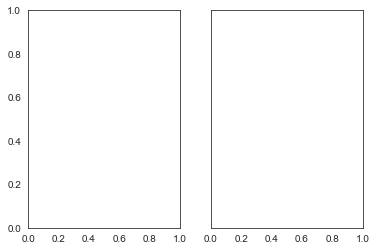

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x=[c13_e.query('variable == "amount_yr0"'), c13_e.query('variable == "amount_yr1"')], y=c13_e['value'], ax=ax1)
sns.regplot(x=[c13_e.query('variable == "amount_yr1"'), c13_e.query('variable == "amount_yr2"')], y=c13_e['value'], ax=ax2)

In [58]:
c13_e

,first_gift_year,variable,value
0,2013-01-01,amount_yr0,30411763.60
1,2013-01-01,amount_yr1,15267703.98
2,2013-01-01,amount_yr2,12587307.39
3,2013-01-01,amount_yr3,11398269.65
4,2013-01-01,amount_yr4,11155755.22


AttributeError: 'str' object has no attribute 'conjugate'

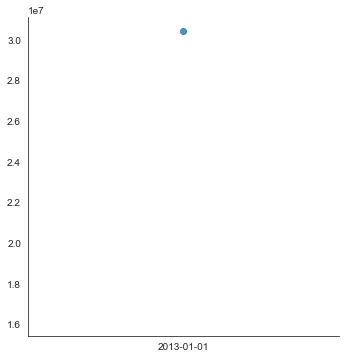

In [65]:
#df=c13_e.query('variable == "amount_yr0"')
sns.lmplot(x='first_gift_year', y='value', hue='variable', data=c13_e)